In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.utils.data import *
from thesis_tools.models.frequentist import *
from thesis_tools.models.bayesian_univariate_time_series import *

In [3]:
df = read_panel_data(observations_threshold=50)
df = df[df['group'] == 'U.S.']

In [4]:
model = Univariate_Pareto_TimeSeries(
    panel_df=df,
    y_column='net_worth',
    X_columns=['constant', 'log_change_gdp_pc', 'log_change_SPX'],
    train_until=2017
)

Panel is too long, truncating to 15 years


In [5]:
model.fit()

In [6]:
trace = model.get_trace()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (56), generating only 20 plots
  warnings.warn(


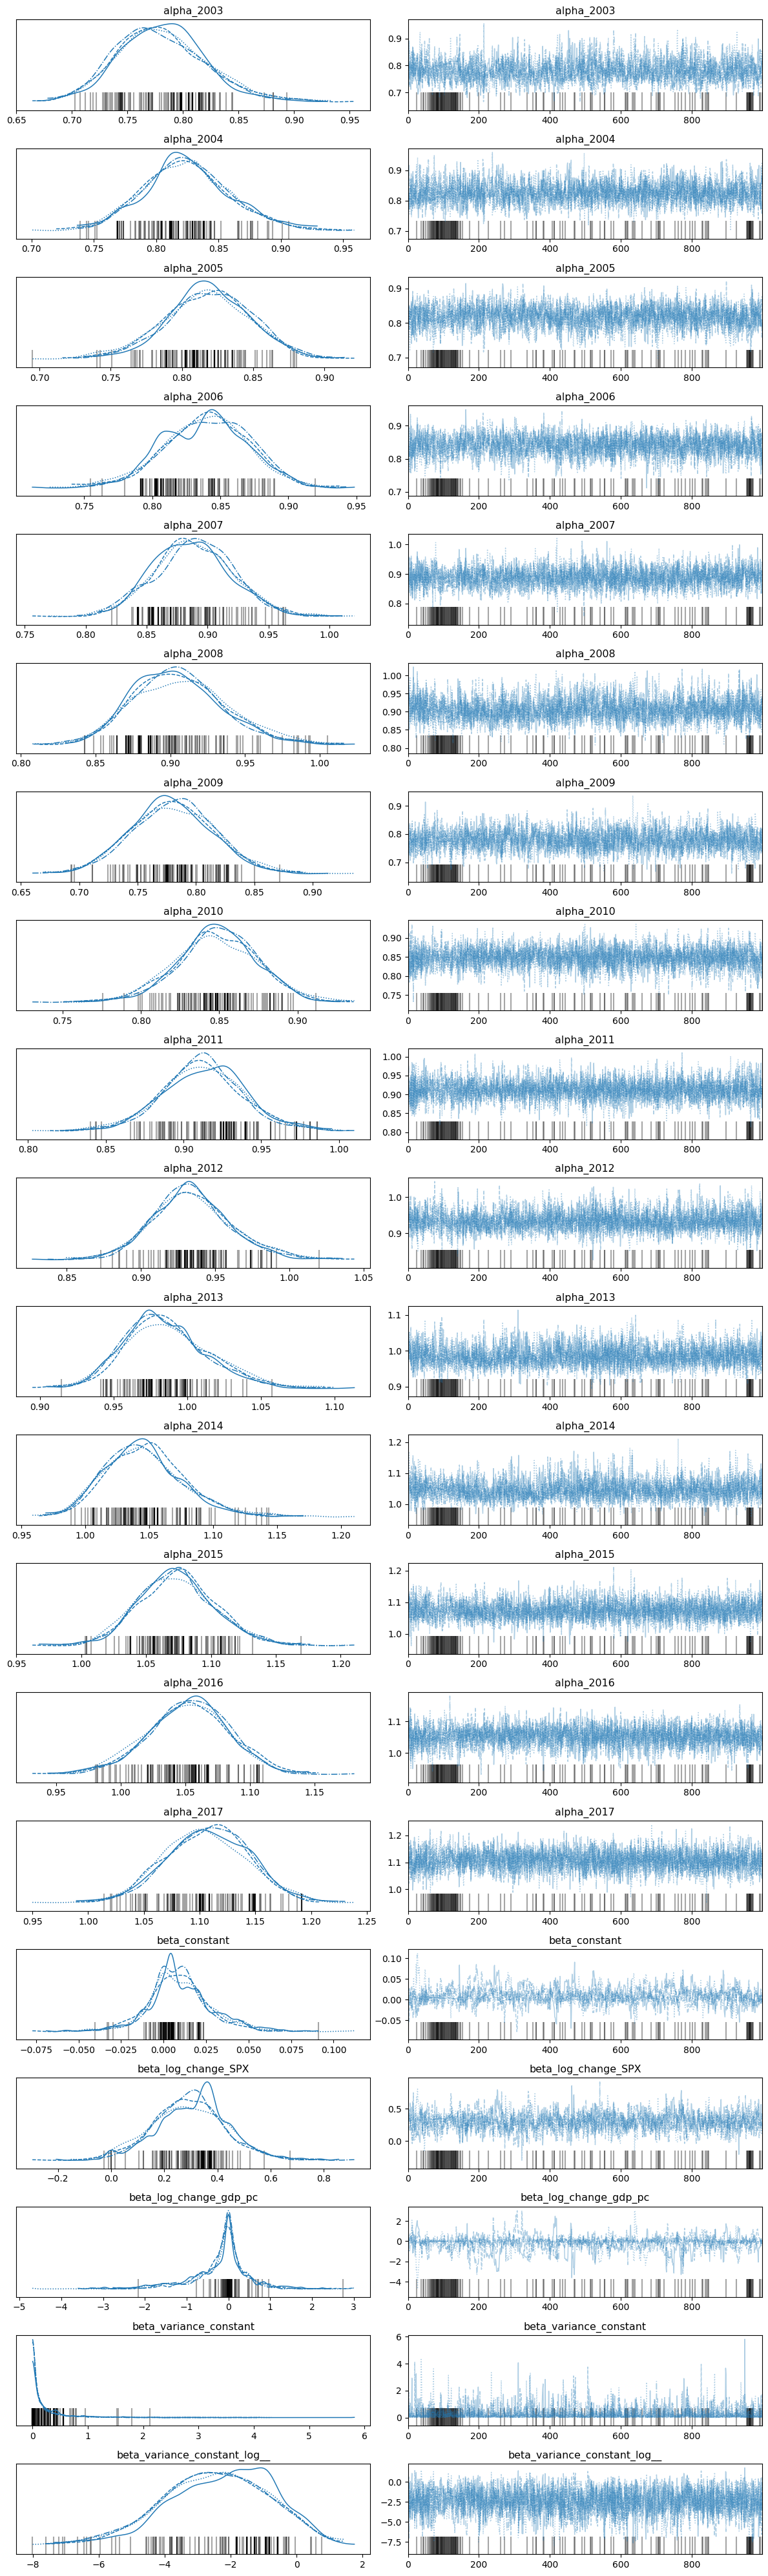

In [7]:
az.plot_trace(trace)
plt.tight_layout()
plt.show()

In [8]:
model.predict()

,alpha_2003,alpha_2004,alpha_2005,alpha_2006,alpha_2007,alpha_2008,alpha_2009,alpha_2010,alpha_2011,alpha_2012,...,y_2019,epsilon_2020,alpha_2020,y_2020,epsilon_2021,alpha_2021,y_2021,epsilon_2022,alpha_2022,y_2022
0,0.752425,0.830303,0.834347,0.810361,0.893049,0.953673,0.713346,0.817502,0.929335,0.938922,...,2.425222,0.003041,1.286625,1.384670,0.001918,1.465686,6542.919601,0.018220,1.710147,10.616505
1,0.859321,0.831472,0.781931,0.827674,0.874941,0.904785,0.841093,0.872257,0.930876,0.967601,...,1.300659,-0.055286,1.095047,1.835282,-0.022873,1.084856,1.654768,0.081176,1.212572,1.778605
2,0.779029,0.770071,0.825435,0.839423,0.891557,0.923817,0.762180,0.860508,0.935022,0.986587,...,6.958945,0.037220,1.240129,3.074770,-0.040545,1.261880,2.833317,-0.042797,1.287812,1.347026
3,0.809344,0.813221,0.846282,0.832831,0.897581,0.947334,0.740865,0.810891,0.878028,0.951590,...,4.589570,0.022307,1.312082,1.461765,0.110376,1.522231,2.957943,-0.009738,1.581137,1.632939
4,0.803515,0.808632,0.841964,0.833255,0.883229,0.932974,0.726102,0.804611,0.882466,0.937769,...,1.107052,0.035610,1.037539,1.369619,0.054329,1.159891,3.548650,0.013648,1.250957,10.552178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.758364,0.767337,0.815899,0.805520,0.891914,0.932657,0.822407,0.849743,0.903849,0.897441,...,1.482657,0.074659,1.393404,1.579024,-0.026455,1.415382,7.223220,0.062910,1.595876,1.313665
3996,0.782239,0.802295,0.791114,0.824543,0.834313,0.878397,0.760415,0.843732,0.921780,0.996169,...,1475.457281,0.036591,1.449177,80.995507,-0.015609,1.441822,2.192396,0.041528,1.557234,1.856083
3997,0.780704,0.802193,0.809638,0.869161,0.919155,0.935772,0.741450,0.839178,0.916468,0.912273,...,2.149220,-0.026116,1.252454,5.292495,-0.001381,1.336920,3.094586,0.026724,1.487882,2.114286
3998,0.734443,0.757374,0.758971,0.779284,0.874712,0.892888,0.817274,0.863916,0.887418,0.942059,...,1.252868,-0.032121,1.140478,2.474748,0.046795,1.258938,1.274181,0.024310,1.366261,1.339539


In [9]:
model.df_train

,group,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,SPX,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
year,,,,,,,,,,,,,,,,,,,,,
2003,U.S.,39490.274956,2937.879883,2747.830078,3567.41,NaN,768.299988,NaN,NaN,855.700012,...,-0.417880,-0.619920,-0.370023,NaN,-0.231568,NaN,NaN,-0.278230,0.005449,1
2004,U.S.,41724.631629,3638.439941,4058.600098,4390.68,NaN,1053.699951,NaN,NaN,1131.130005,...,0.213867,0.390027,0.207644,NaN,0.315883,NaN,NaN,0.279053,0.058851,1
2005,U.S.,44123.407068,3913.689941,4254.850098,4852.31,NaN,1155.599976,NaN,NaN,1181.270020,...,0.072926,0.047221,0.099971,NaN,0.092312,NaN,NaN,0.043373,-0.288708,1
2006,U.S.,46302.000880,4947.990234,5674.149902,5760.26,NaN,1297.300049,NaN,NaN,1280.079956,...,0.234501,0.287861,0.171528,NaN,0.115666,NaN,NaN,0.080332,0.054076,1
2007,U.S.,48050.223777,5608.310059,6789.109863,6203.09,NaN,1515.400024,NaN,NaN,1438.239990,...,0.125268,0.179399,0.074065,NaN,0.155394,NaN,NaN,0.116498,0.795167,1
2008,U.S.,48570.045980,4869.790039,6851.750000,5879.78,NaN,1486.400024,5137.450195,NaN,1378.550049,...,-0.141199,0.009184,-0.053528,NaN,-0.019322,NaN,NaN,-0.042388,0.453096,1
2009,U.S.,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,825.880005,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
2010,U.S.,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,1073.869995,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1
2011,U.S.,50065.966504,4005.500000,7077.479980,5862.94,NaN,1331.699951,5505.899902,NaN,1286.119995,...,0.068727,0.232583,0.122203,NaN,0.173574,0.120255,NaN,0.180361,-0.068746,1


In [10]:
model.df_test

,group,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,SPX,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
year,,,,,,,,,,,,,,,,,,,,,
2018,U.S.,62823.309438,5481.930176,13189.480469,7533.55,2289.989990,2171.500000,11027.700195,1594.35,2823.810059,...,0.143544,0.134007,0.059391,0.032217,0.184581,0.253158,0.065444,0.214407,0.096964,1
2019,U.S.,65120.394663,4992.720215,11173.099609,6968.85,2521.100098,2029.599976,10830.950195,1472.32,2704.100098,...,-0.093476,-0.165911,-0.077916,0.096148,-0.067579,-0.018003,-0.079627,-0.043318,-0.297712,1
2020,U.S.,63528.634303,5806.339844,12981.969727,7286.01,3076.649902,2342.399902,11962.099609,1706.09,3225.520020,...,0.150970,0.150052,0.044506,0.199146,0.143337,0.099335,0.147365,0.176325,0.141198,1
2021,U.S.,70219.472454,5399.209961,13432.870117,6407.46,3277.080078,2661.699951,13634.599609,1972.36,3714.239990,...,-0.072698,0.034143,-0.128493,0.063111,0.127789,0.130867,0.145027,0.141080,0.157156,1
2022,U.S.,76329.582265,6999.200195,15471.200195,7464.37,3530.379883,3052.500000,17339.849609,2227.07,4515.549805,...,0.259543,0.141276,0.152678,0.074453,0.136996,0.240397,0.121456,0.195353,-0.035544,1


In [11]:
trace_df = trace['posterior'].to_dataframe().reset_index(drop=True)

In [12]:
def predict(row, df_test, X_columns, year):
    row[f'epsilon_{year}'] = np.random.normal(loc=0, scale=row['epsilon_alpha'])
    cum_sum = 0
    for X_column in X_columns:
        cum_sum += row[f'beta_{X_column}'] * df_test.loc[year, X_column]
    cum_sum += row[f'epsilon_{year}']
    row[f'alpha_{year}'] = row[f'alpha_{year - 1}'] * np.exp(cum_sum)
    row[f'y_{year}'] = Pareto(alpha=row[f'alpha_{year}'], x_m=1).sample(1)[0]
    return row

In [13]:
# Apply this to the trace_df
for year in model.df_test.index:
    trace_df = trace_df.apply(lambda row: predict(
        row=row, 
        df_test=model.df_test, 
        X_columns=['constant', 'log_change_gdp_pc', 'log_change_SPX'],
        year=year
        ), axis=1)

In [14]:
trace_df

,alpha_2003,alpha_2004,alpha_2005,alpha_2006,alpha_2007,alpha_2008,alpha_2009,alpha_2010,alpha_2011,alpha_2012,...,y_2019,epsilon_2020,alpha_2020,y_2020,epsilon_2021,alpha_2021,y_2021,epsilon_2022,alpha_2022,y_2022
0,0.752425,0.830303,0.834347,0.810361,0.893049,0.953673,0.713346,0.817502,0.929335,0.938922,...,1.587484,-0.068843,1.154133,2.916724,-0.036603,1.265074,5.827616,-0.144123,1.254884,80.992124
1,0.859321,0.831472,0.781931,0.827674,0.874941,0.904785,0.841093,0.872257,0.930876,0.967601,...,1.023559,0.020563,1.233722,56.865881,0.014962,1.269371,1.268979,-0.033142,1.265541,1.359332
2,0.779029,0.770071,0.825435,0.839423,0.891557,0.923817,0.762180,0.860508,0.935022,0.986587,...,1.862770,0.025673,1.316519,87.025648,0.038704,1.450094,1.448175,0.055921,1.633440,1.234941
3,0.809344,0.813221,0.846282,0.832831,0.897581,0.947334,0.740865,0.810891,0.878028,0.951590,...,3.058679,0.012803,1.363466,1.862930,0.146277,1.639666,1.461034,0.059280,1.824814,3.271253
4,0.803515,0.808632,0.841964,0.833255,0.883229,0.932974,0.726102,0.804611,0.882466,0.937769,...,9.254799,-0.043923,1.041181,1.256722,-0.010803,1.090568,2.902305,-0.010212,1.148459,1.209638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.758364,0.767337,0.815899,0.805520,0.891914,0.932657,0.822407,0.849743,0.903849,0.897441,...,6.668582,-0.003451,1.272579,2.278828,-0.034160,1.282730,72.220859,0.114396,1.522723,23.566003
3996,0.782239,0.802295,0.791114,0.824543,0.834313,0.878397,0.760415,0.843732,0.921780,0.996169,...,1.421073,-0.055587,1.206930,3.097146,-0.010043,1.207507,1.719948,0.042402,1.305304,1.139686
3997,0.780704,0.802193,0.809638,0.869161,0.919155,0.935772,0.741450,0.839178,0.916468,0.912273,...,1.150439,0.015876,1.355940,1.246377,0.006909,1.459434,1.079285,-0.029855,1.534884,13.577669
3998,0.734443,0.757374,0.758971,0.779284,0.874712,0.892888,0.817274,0.863916,0.887418,0.942059,...,3.201714,-0.049295,1.057139,32.444587,-0.068753,1.039603,1.076083,0.026914,1.131169,1.233681
